# Technical Report: Risk Factor Analysis in Obesity (Mexico, Peru, and Colombia)

## 1. Introduction
Obesity is a multi-causal public health challenge that critically affects the Latin American region. This report presents an exploratory and inferential analysis based on the dataset by Palechor and De la Hoz (2019). The primary goal is to identify how lifestyle habits and physical conditions influence the Obesity Level.

Moving beyond a generic analysis, this study focuses on the male subpopulation to validate whether global trends persist under a specific demographic filter, enabling a more granular interpretation of the associated risks.

## 2. Methodology
The execution of this study was based on an analytical workflow designed to ensure the transparency and reproducibility of the findings. The process began with the data acquisition and cleaning phase, where the original dataset was loaded to validate the integrity of the data structures and the nature of the variables. Subsequently, a descriptive analysis focused on the frequency of weight categories was implemented, establishing a baseline for the health distribution within the global sample of 2,111 records.

To delve deeper into the relationship between behavioral habits and physical condition, advanced statistical visualization techniques were utilized, employing box plots and bar charts to facilitate the identification of visual correlations and outliers. All processing was carried out under a critical approach that distinguishes between direct physical measurements and those variables that, due to the dataset's prior statistical preprocessing, require an interpretation based on trends rather than absolute values.

### 2.1 Initial Data Exploration

To begin, we will load the dataset and perform a preliminary inspection to understand its structure, volume, and the nature of the recorded variables. For this purpose, we will use `pandas`, an industry-standard tool for structured data manipulation and analysis.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv("Obesity_Data.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'Obesity_Data.csv' was not found.")

Dataset loaded successfully.


#### Structure Visualization
We use the `head()` command to display the first entries of the database. This allows us to quickly validate that the file reading was correct and observe the column formatting.

In [9]:
df.head()

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,Overweight_Level_II


#### Study Dimensions
The `shape` property indicates the total dimensions of the database (rows x columns).

In [16]:
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 2111 rows and 10 columns.


#### Data Typology
The report generated by `info()` is fundamental for auditing data quality. It allows us to identify:
*   **Data Types:** Whether variables are numerical (e.g., `float64` for decimals) or categorical (e.g., `object` for text).
*   **Consistency:** If there are missing values (nulls) that require treatment.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  2111 non-null   object 
 1   Edad                  2111 non-null   float64
 2   Estatura              2111 non-null   float64
 3   Peso                  2111 non-null   float64
 4   FamiliarConSobrepeso  2111 non-null   object 
 5   ComeMuchasCalorias    2111 non-null   object 
 6   ComeVegetales         2111 non-null   float64
 7   Fumador               2111 non-null   object 
 8   ConsumoDeAgua         2111 non-null   float64
 9   NivelDeObesidad       2111 non-null   object 
dtypes: float64(5), object(5)
memory usage: 165.1+ KB


The analysis confirms that the database is composed of two main categories of variables:

1. **Categorical Variables (Qualitative):**
- Gender
- Family history with overweight
- Frequent consumption of high-calorie food
- Smoking habit
- Obesity Level 

2. **Numerical Variables (Quantitative):** 
- Age
- Height (meters)
- Weight (kilograms)
- Vegetable consumption
- Water consumption

> **Technical Note:** The variables `VegetableConsumption` and `WaterConsumption` are presented in the dataset as continuous numerical values (with decimals). However, in their original design they represent frequency levels on a scale of **1 to 3**. The presence of decimals is the result of data preprocessing and augmentation techniques (such as SMOTE) applied to balance the set; therefore they should be interpreted as trend indicators within those ordinal levels.

#### Statistical Profile
For numerical variables, we generate a statistical summary that includes measures of central tendency (mean) and dispersion (standard deviation, ranges).

In [12]:
df.describe()

,Edad,Estatura,Peso,ComeVegetales,ConsumoDeAgua
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.008011
std,6.345968,0.093305,26.191172,0.533927,0.612953
min,14.000000,1.450000,39.000000,1.000000,1.000000
25%,19.947192,1.630000,65.473343,2.000000,1.584812
50%,22.777890,1.700499,83.000000,2.385502,2.000000
75%,26.000000,1.768464,107.430682,3.000000,2.477420
max,61.000000,1.980000,173.000000,3.000000,3.000000


**Interpretation of Statistical Profile:**

*   **Sample (Count):** The study has complete data for **2,111 individuals**.
*   **Central Tendency (Mean):** The average age of the studied population is **~24.3 years**, with an average weight of **~86.6 kg**.
*   **Value Range (Min/Max):** Data falls within biologically plausible ranges:
    *   *Age:* 14 to 61 years.
    *   *Weight:* 39 to 173 kg.
    *   *Note:* Consumption variables (Vegetables/Water) operate on a scale of 1 to 3, suggesting a frequency measurement (Low, Medium, High).
*   **Dispersion (Std):** Standard deviation indicates how varied the data is.
    *   *Height* shows low variability (0.09), indicating homogeneity in the population.
    *   *Weight* shows high variability (26.19), suggesting a diverse sample ranging from underweight to morbid obesity.
*   **Distribution (Percentiles):**
    *   50% of the population (Median) is under **22.7 years old**, indicating a predominantly young population.

## 2.2 Reflection on Study Design

After analyzing the available data, the inclusion of an **additional variable** is proposed, which would significantly complement the study:

***Proposed Variable:*** **"Weekly Exercise Hours"** (or Physical Activity Frequency)

**Justification:**
Observing the current variables, we have information regarding caloric **intake** (*HighCaloricIntake, VegetableConsumption, WaterConsumption*), but we lack detailed information regarding caloric **expenditure**. If the objective is to study obesity, knowing only how much people eat without knowing how much they move provides only half of the equation.

* **Nature of the Variable:** Quantitative (Continuous).
* **Type of Information:** It would provide numerical data on the time dedicated to physical activity.
    * *Measurement Proposal:* It is suggested to measure this in **"Hours per week"** rather than daily. This is justified because physical activity tends to fluctuate day by day (e.g., people who go to the gym 3 times a week). A weekly average captures real long-term habits better than a punctual daily measurement.

    The choice of a weekly measurement is based on **World Health Organization (2020)** recommendations, which state that physical activity should be measured as a weekly accumulation (e.g., 150-300 minutes of moderate aerobic activity). This approach accurately captures long-term habits, accounting for daily fluctuations.

### 2.3 Definition of a variable of interest for inference

**Selected Variable:** `ObesityLevel`

**Justification:**
The primary goal of an inferential study is to explain the "why" behind a specific phenomenon. When analyzing the available variables, `ObesityLevel` is identified as the logical "consequence" resulting from the interaction between various biological and behavioral factors:

* **Limited biological variables:** Factors such as *Gender*, *Age*, or *Height* are intrinsic or random characteristics of the individual; therefore, they function as inputs (predictors) rather than behavioral outcomes.
* **Limitations of Weight as a raw metric:** Although *Weight* is a strong candidate, it can be statistically misleading. This occurs because weight does not distinguish between body compartments; for example, individuals with a high density of **lean mass** (muscle and bone tissue) may register high weights without this representing a metabolic risk due to excess fat.
* **Obesity Level as a health metric:** This variable acts as a categorization that normalizes weight relative to height, offering a more precise assessment of clinical risk than weight alone.
* **Habits as predictor variables:** Behaviors (such as *Smoking* and *Water/Vegetable Consumption*) function more effectively as **causes** or predictor variables, whose cumulative effect is reflected in the individual's weight category.

Therefore, it is logically consistent to attempt to infer an individual's obesity level based on the relationship between their habits, demography, and physical constitution.

--- Distribution by Category ---
NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

--- Percentage of Total ---
NivelDeObesidad
Obesity_Type_I         16.63%
Obesity_Type_III       15.35%
Obesity_Type_II        14.07%
Overweight_Level_I     13.74%
Overweight_Level_II    13.74%
Normal_Weight           13.6%
Insufficient_Weight    12.88%
Name: proportion, dtype: object


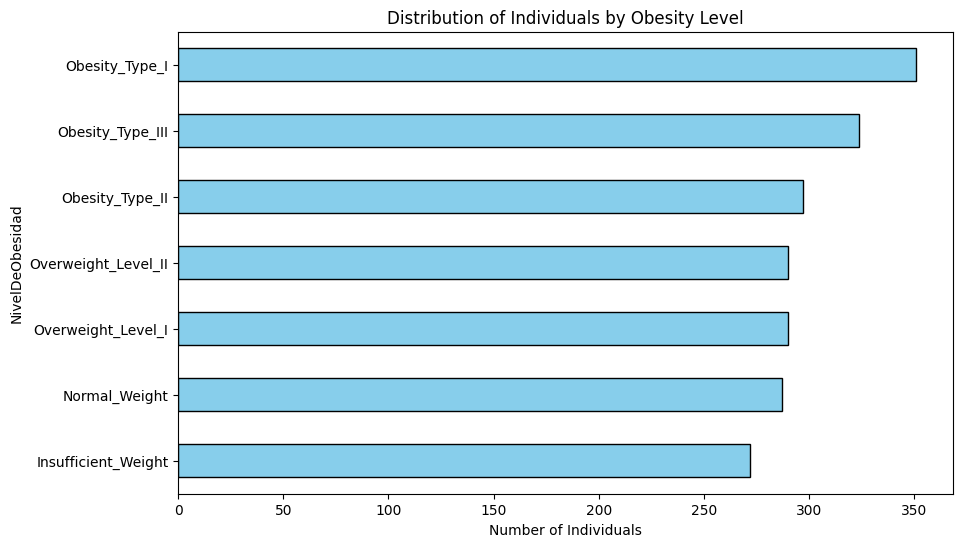

In [17]:
# Descriptive analysis of the variable of interest (Obesity_Level)
# Since it is categorical, we analyze the distribution of its categories

conteo_obesidad = df['NivelDeObesidad'].value_counts()
porcentaje_obesidad = df['NivelDeObesidad'].value_counts(normalize=True) * 100

print("--- Distribution by Category ---")
print(conteo_obesidad)
print("\n--- Percentage of Total ---")
print(porcentaje_obesidad.round(2).astype(str) + '%')

# Basic Visualization
plt.figure(figsize=(10, 6))
conteo_obesidad.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Individuals by Obesity Level')
plt.xlabel('Number of Individuals')
plt.show()

**Interpretation of Category Distribution:**

When observing the frequency of obesity levels, it is notable that **Obesity_Type_I** is the category with the highest representation in the analyzed population. This indicates that a significant portion of the evaluated individuals is already in a state of active clinical risk.

Conversely, the **Insufficient_Weight** category presents the lowest frequency, which suggests that, within this geographic context (Mexico, Peru, and Colombia), the health problem is significantly more inclined toward excess body mass rather than weight insufficiency.

## 2.4 Graphical Analysis: Subpopulation Focus

**Selected Subpopulation:** Men (`Male`)
**Variables to Analyze:** `Weight` (Potential Cause/Direct Correlation) vs `Obesity_Level` (Variable of Interest)

**Justification:**
We have decided to filter the dataset to exclusively analyze the male population and observe the direct relationship between their weight in kilograms and their obesity classification. We expect to see a clear positive correlation, but the boxplot will allow us to visualize ranges and detect overlaps (e.g., Are there men with "Overweight" who weigh more than someone with "Obesity Type I" due to their height?).

<Figure size 1200x800 with 0 Axes>

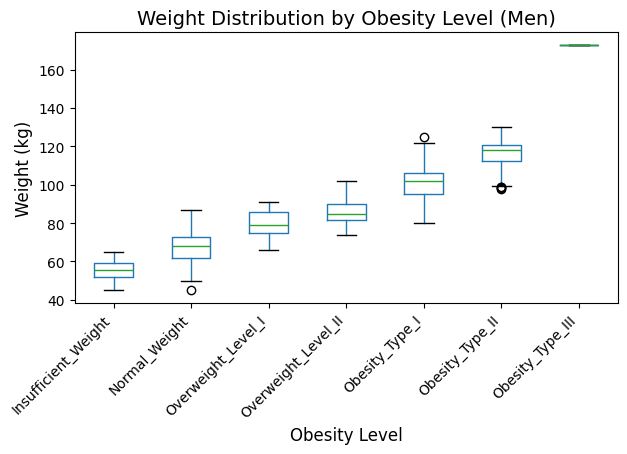

In [14]:
# 1. Define the logical health order
health_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

# 2. Convert the column to "Categorical" type with the desired order
# This forces the graph to follow our specific order instead of alphabetical
df['NivelDeObesidad'] = pd.Categorical(df['NivelDeObesidad'], categories=health_order, ordered=True)

# 3. Filter only men
df_men = df[df['Sexo'] == 'Male']

# 4. Create the Boxplot using only Pandas
plt.figure(figsize=(12, 8))
df_men.boxplot(column='Peso', by='NivelDeObesidad', grid=False)

# 5. Aesthetic adjustments for a professional look
plt.suptitle('') # Remove the default Pandas title
plt.title('Weight Distribution by Obesity Level (Men)', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Chart Interpretation and Reading Guide:**

To understand this boxplot:
> *   **The Box:** Represents the central 50% of the population. The line inside the box is the **median** (the central value).
> *   **The Whiskers (Vertical lines):** Show the expected or "normal" weight range for that group.
> *   **The Dots:** Are outliers, exceptional cases that fall outside the norm.

**Findings:**
1.  **Stepped Trend:** There is a visible and positive correlation; as the obesity category increases, weight ranges rise "in steps".
2.  **Group Differentiation:**
    *   *Obesity Levels I, II, and III* are clearly separated from each other, with little overlap.
    *   *Obesity Type III* behaves as an extreme category, with a weight range starting (~120kg) where almost all other categories end.
3.  **The Hidden Factor (Height):** There is notable overlap between *Normal Weight* and *Overweight Level I*. This validates the importance of not considering weight in isolation, as height is a key confounding factor (a short overweight man could weigh the same as a tall normal-weight man).

## 3. Conclusions
After completing the exploratory and inferential analysis, the results reveal that the studied population in Mexico, Peru, and Colombia presents a health challenge significantly skewed toward excess body mass. The high prevalence of individuals in the Obesity Type I category is a critical finding that underscores the need to strengthen preventive intervention policies, especially considering that weight insufficiency is the least frequent condition in the sample. The consistency observed between body weight and the tiering of risk categories validates the robustness of the original labeling, confirming that this dataset is a valuable resource for training future machine learning models.

However, it is essential to highlight a significant technical limitation regarding data granularity. Variables related to water and vegetable consumption exhibit a continuous nature due to data augmentation techniques (SMOTE); therefore, they must be interpreted strictly as trend indicators within ordinal levels. For future research, it is recommended to integrate metrics for active caloric expenditure and lean mass composition, which would allow for a more comprehensive understanding of the etiology of obesity in the region, overcoming the limitations inherent in an analysis based exclusively on weight and height.

## 4. References

- Palechor, F. M., & De la Hoz Manotas, A. (2019). Estimation of obesity levels based on eating habits and physical condition [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z

- World Health Organization. (2020). WHO guidelines on physical activity and sedentary behaviour. World Health Organization. https://www.who.int/publications/i/item/9789240015128